In [5]:
# Some steps required until these Python modules are properly installed...
import sys
sys.path.append('../Modules')
# Get the GBR module
import gbr
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
gbr.init('E:/Beckers/Output/Scenario 1/')
gbr.available()

['Beta3810']

In [9]:
results = gbr.Results('Beta3810')

In [10]:
raw = results.get('RawResults')

In [11]:
raw

,ModelElementType,ModelElement,FU,BudgetElement,Process,Total_Load_in_Kg
Constituent,,,,,,
P_Particulate,Catchment,SC #3,Cropping,Undefined,Supply,0.000000e+00
Ametryn,Catchment,SC #3,Cropping,Hillslope no source distinction,Supply,0.000000e+00
Ametryn,Catchment,SC #3,Cropping,Seepage,Supply,0.000000e+00
Ametryn,Catchment,SC #3,Cropping,Leached,Other,0.000000e+00
Atrazine,Catchment,SC #3,Cropping,Hillslope no source distinction,Supply,0.000000e+00
Atrazine,Catchment,SC #3,Cropping,Seepage,Supply,0.000000e+00
Atrazine,Catchment,SC #3,Cropping,Leached,Other,0.000000e+00
Tebuthiuron,Catchment,SC #3,Cropping,Undefined,Supply,0.000000e+00
Sediment - Fine,Catchment,SC #3,Cropping,Hillslope surface soil,Supply,0.000000e+00


In [12]:
linkYields = raw[raw.BudgetElement=='Link Yield']

In [13]:
relevantLinkYields = linkYields[linkYields.ModelElement.isin(['SC #1', 'SC #3'])]

In [14]:
loadsForComparison = relevantLinkYields.reset_index().pivot('ModelElement','Constituent','Total_Load_in_Kg')
loadsForComparison

Constituent,Ametryn,Atrazine,Flow,N_DIN,N_DON,N_Particulate,P_DOP,P_FRP,P_Particulate,Sediment - Coarse,Sediment - Fine,Tebuthiuron
ModelElement,,,,,,,,,,,,
SC #1,0,0,3.421660e+12,6.553809e+08,6.553809e+08,2.303192e+09,6.082857e+08,6.082857e+08,2.124818e+09,0,1.961794e+10,0
SC #3,0,0,6.878285e+11,1.314864e+08,1.314864e+08,1.146625e+09,1.239676e+08,1.239676e+08,3.112499e+08,0,9.392342e+09,0


In [15]:
loadsForComparison /= 1e3

In [16]:
loadsForComparison['Sediment - Fine'] /= 1e3
loadsForComparison.Flow /= 1e3

In [17]:
loadsForComparison

Constituent,Ametryn,Atrazine,Flow,N_DIN,N_DON,N_Particulate,P_DOP,P_FRP,P_Particulate,Sediment - Coarse,Sediment - Fine,Tebuthiuron
ModelElement,,,,,,,,,,,,
SC #1,0,0,3421660.439428,655380.875456,655380.875456,2303191.993228,608285.678895,608285.678895,2124817.589583,0,19617.944885,0
SC #3,0,0,687828.506265,131486.410744,131486.410744,1146624.775964,123967.610746,123967.610746,311249.857057,0,9392.342346,0


In [18]:
loadsForComparison.to_csv('observed_loads.csv')

In [19]:
pwd

'E:\\Python_Scripting\\python_for_gbr\\Scripting\\Examples'

In [20]:
import pandas as pd

In [21]:
observedLoads = pd.DataFrame.from_csv('observed_loads.csv')
observedLoads

,Ametryn,Atrazine,Flow,N_DIN,N_DON,N_Particulate,P_DOP,P_FRP,P_Particulate,Sediment - Coarse,Sediment - Fine,Tebuthiuron
ModelElement,,,,,,,,,,,,
SC #1,0,0,3421660.439428,655380.875456,655380.875456,2303191.993228,608285.678895,608285.678895,2124817.589583,0,19617.944885,0
SC #3,0,0,687828.506265,131486.410744,131486.410744,1146624.775964,123967.610746,123967.610746,311249.857057,0,9392.342346,0


In [28]:
loadsForComparison['ValueType']='Predicted'
observedLoads['ValueType']='Observed'
pd.concat([loadsForComparison,observedLoads]).reset_index().set_index(['ModelElement','ValueType'])

,Constituent,Ametryn,Atrazine,Flow,N_DIN,N_DON,N_Particulate,P_DOP,P_FRP,P_Particulate,Sediment - Coarse,Sediment - Fine,Tebuthiuron
ModelElement,ValueType,,,,,,,,,,,,
SC #1,Predicted,0,0,3421660.439428,655380.875456,655380.875456,2303191.993228,608285.678895,608285.678895,2124817.589583,0,19617.944885,0
SC #3,Predicted,0,0,687828.506265,131486.410744,131486.410744,1146624.775964,123967.610746,123967.610746,311249.857057,0,9392.342346,0
SC #1,Observed,0,0,3421660.439428,655380.875456,655380.875456,2303191.993228,608285.678895,608285.678895,2124817.589583,0,19617.944885,0
SC #3,Observed,0,0,687828.506265,131486.410744,131486.410744,1146624.775964,123967.610746,123967.610746,311249.857057,0,9392.342346,0


In [68]:
pd.DataFrame([observedLoads.ix['SC #1'],loadsForComparison.ix['SC #1']],index=['Observed','Predicted']).transpose()

,Observed,Predicted
Ametryn,NaN,0.000000
Atrazine,NaN,0.000000
Flow,3018102.4960,3418102.496305
N_DIN,654643.5753,654643.575267
N_DON,NaN,654643.575267
N_Particulate,3400976.0580,3400976.057746
P_DOP,607578.7226,607578.722635
P_FRP,607578.7226,607578.722635
P_Particulate,NaN,NaN
Sediment - Coarse,0.0000,0.000000


In [69]:
obs_vs_pred = _

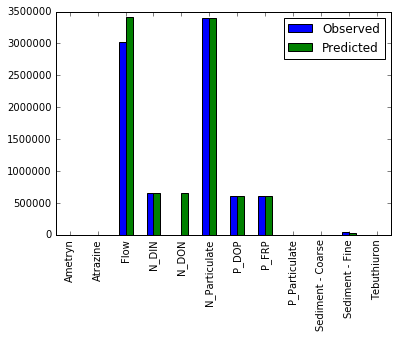

In [70]:
obs_vs_pred.plot(kind='bar')

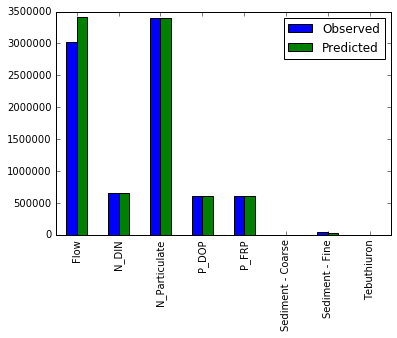

In [73]:
obs_vs_pred.dropna().plot(kind='bar')

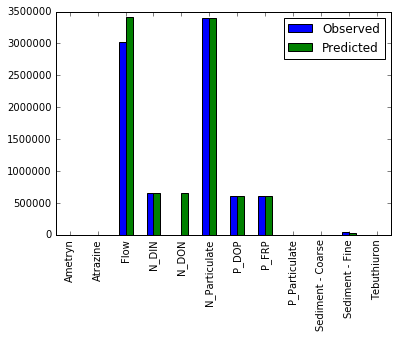

In [72]:
obs_vs_pred.plot(kind='bar')

In [77]:
fineSediment = pd.DataFrame([loadsForComparison['Sediment - Fine'],observedLoads['Sediment - Fine']],index=['Pred','Obs']).transpose()
fineSediment

,Pred,Obs
ModelElement,,
SC #1,30070.770604,42070.77060
SC #3,9392.342346,11392.34235


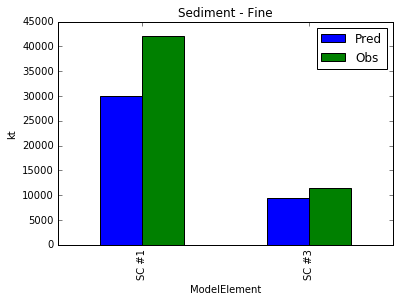

In [81]:
fineSediment.plot(kind='bar',title='Sediment - Fine')
ylabel('kt')

In [86]:
pp_fs_ratio = loadsForComparison.N_Particulate / (1000.0*loadsForComparison['Sediment - Fine'])

In [87]:
pp_fs_ratio

ModelElement
SC #1    0.113099
SC #3    0.121681
dtype: float64